In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import ast
from tqdm import tqdm
import time
from collections import Counter
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
data=pd.read_csv('model data/final.csv')
data.shape

(142776, 14)

In [4]:
data.head()

,latitude,longitude,nkill,days_passed,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,PRECI_AVG,TEMP_AVG,population,ethnic_groups,topography_elevation,nightlight_intensity,happy_index
0,18.5,-70.0,1,17834,1415040.0,1285293.0,33082.41,1703.198276,26.640805,2180.63,99999,62.00,59.82,4.885
1,34.8,37.3,1,1406,73722.0,1133031.0,140738.70,198.627586,17.571624,14.11,1,821.48,0.94,3.006
2,14.5,44.4,1,1407,826500.5,1737351.0,196373.80,347.809479,20.158693,214.15,3,2445.19,10.57,4.077
3,36.5,40.7,1,1407,167311.2,943071.2,432522.10,542.012062,16.618319,178.64,3,311.09,10.94,3.006
4,33.6,36.3,1,1406,199295.5,1169763.0,56242.69,516.005172,14.889152,74.82,1,1157.07,31.62,3.006


In [5]:
data.drop(columns=['days_passed'],inplace=True)

In [6]:
df=data.groupby(['latitude','longitude'],as_index=False).size()

In [7]:
df=df.reset_index()

In [8]:
df.columns=['latitude','longitude','freq']

In [9]:
df.head()

,latitude,longitude,freq
0,-53.2,-70.9,4
1,-51.7,-57.9,1
2,-45.9,-67.5,3
3,-45.6,-72.1,1
4,-45.4,-72.7,1


In [10]:
data.drop_duplicates(subset=['latitude','longitude'],inplace=True)

In [11]:
dict={}
for i in range(df.shape[0]):
    lat=df.at[i,'latitude']
    lon=df.at[i,'longitude']
    cnt=df.at[i,'freq']
    
    dict[str(lat)+" "+str(lon)]=cnt

In [12]:
l=[]
for i in range(data.shape[0]):
    lat=df.at[i,'latitude']
    lon=df.at[i,'longitude']

    l.append(dict[str(lat)+" "+str(lon)])

In [13]:
data['freq']=l

In [14]:
data['nkill'].value_counts()

1    14766
0     8155
Name: nkill, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22921 entries, 0 to 142766
Data columns (total 14 columns):
latitude                22921 non-null float64
longitude               22921 non-null float64
nkill                   22921 non-null int64
DIS_LAKE                22921 non-null float64
DIS_MAJOR_RIVER         22921 non-null float64
DIS_OCEAN               22921 non-null float64
PRECI_AVG               22921 non-null float64
TEMP_AVG                22921 non-null float64
population              22921 non-null float64
ethnic_groups           22921 non-null int64
topography_elevation    22921 non-null float64
nightlight_intensity    22921 non-null float64
happy_index             22921 non-null float64
freq                    22921 non-null int64
dtypes: float64(11), int64(3)
memory usage: 2.6 MB


In [22]:
def plot_map(lat,lon,label):
    fig = plt.figure(figsize=(12,15))
    # determine range to print based on min, max lat and lon of the data
    margin = 2 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    # create map using BASEMAP
    m = Basemap(llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max-lon_min)/2,
                projection='merc',
                resolution = 'h',
                area_thresh=10000.,
                )
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color = 'white',lake_color='#46bcec')
    # convert lat and lon to map projection coordinates
    lons, lats = m(lon, lat)
    # plot points as red dots
    m.scatter(lons, lats, marker = 'o', color='r', zorder=4)
    plt.title(label)
    plt.show()

### checking where topography_elevation is 99999

In [23]:
tt=data[data['topography_elevation']==99999]
tt.shape

(702, 14)

In [24]:
tt.head()

,latitude,longitude,nkill,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,PRECI_AVG,TEMP_AVG,population,ethnic_groups,topography_elevation,nightlight_intensity,happy_index,freq
8,35.9,10.6,1,287681.5,1262467.0,21061.6,453.281600,18.368390,99999.0,99999,99999.0,44.96,4.739,2
16,1.7,44.8,1,881817.6,3057728.0,43757.3,478.150579,27.514177,99999.0,99999,99999.0,0.94,99999.000,1
81,32.8,22.6,1,723646.4,1279167.0,42258.6,245.354014,18.483908,99999.0,99999,99999.0,24.94,5.754,1
130,46.4,30.8,1,137172.3,213671.4,3918.5,379.844828,10.028448,99999.0,99999,99999.0,18.59,4.681,19
166,-0.4,42.5,1,639516.5,3088254.0,67104.2,594.956900,27.597343,99999.0,99999,99999.0,0.29,99999.000,1


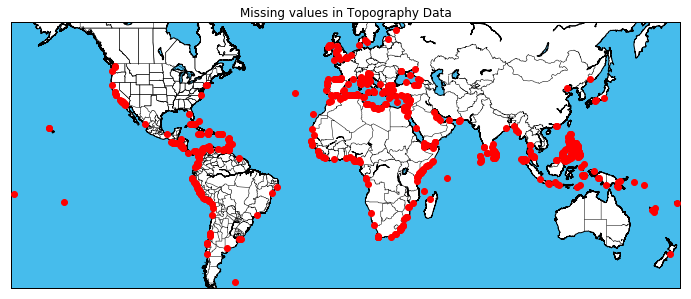

In [25]:
lat=tt['latitude'].values
lon=tt['longitude'].values

plot_map(lat,lon,"Missing values in Topography Data")

In [26]:
# we see that all topography_elevation are 99999 where there are attacks in ocean
# so make there ethnic groups and population to be 0 when topography_elevation is 0 or 99999
ind=list(data[data['topography_elevation']==0].index)
for i in ind:
    if int(data.at[i,'population'])==99999:
         data.at[i,'population']=0
    if int(data.at[i,'ethnic_groups'])==99999:
         data.at[i,'ethnic_groups']=0
            

ind=list(data[data['topography_elevation']==99999].index)
for i in ind:
    data.at[i,'topography_elevation']=0
    if int(data.at[i,'population'])==99999:
         data.at[i,'population']=0
    if int(data.at[i,'ethnic_groups'])==99999:
         data.at[i,'ethnic_groups']=0

### checking where ethnic_groups and poplation are 99999

In [27]:
tt=data[data['population']==99999]
tt.shape

(509, 14)

In [28]:
tt.head()

,latitude,longitude,nkill,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,PRECI_AVG,TEMP_AVG,population,ethnic_groups,topography_elevation,nightlight_intensity,happy_index,freq
134,14.3,122.5,1,130072.5,1400308.0,16782.23,2315.018966,27.057328,99999.0,1,25.40,0.75,5.073,2
161,25.3,63.5,1,270170.3,1542649.0,33804.14,103.967816,25.939751,99999.0,99999,14.28,3.91,5.194,1
202,7.9,81.5,1,1637823.0,1943106.0,16319.98,1589.858621,28.529885,99999.0,3,4.86,11.59,4.271,75
229,35.8,10.6,1,287681.5,1262467.0,21061.60,453.281600,18.368390,99999.0,99999,12.00,59.51,4.739,3
351,14.0,121.9,1,130072.5,1400308.0,16782.23,2315.018966,27.057328,99999.0,1,14.28,2.96,5.073,7


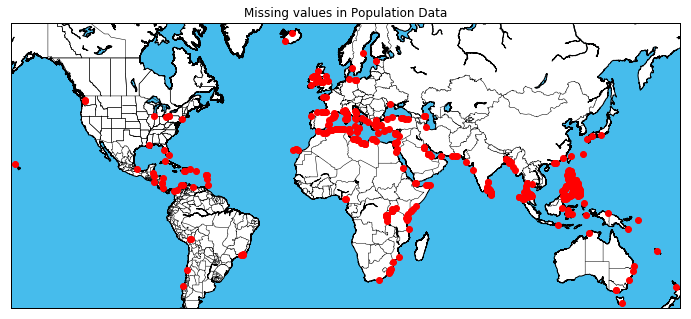

In [29]:
lat=tt['latitude'].values
lon=tt['longitude'].values

plot_map(lat,lon,"Missing values in Population Data")

### removing all rows where value is 99999

In [30]:
df = data.replace(99999, pd.np.nan)

In [31]:
data=df.dropna()

In [32]:
data.reset_index(inplace=True,drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19232 entries, 0 to 19231
Data columns (total 14 columns):
latitude                19232 non-null float64
longitude               19232 non-null float64
nkill                   19232 non-null int64
DIS_LAKE                19232 non-null float64
DIS_MAJOR_RIVER         19232 non-null float64
DIS_OCEAN               19232 non-null float64
PRECI_AVG               19232 non-null float64
TEMP_AVG                19232 non-null float64
population              19232 non-null float64
ethnic_groups           19232 non-null float64
topography_elevation    19232 non-null float64
nightlight_intensity    19232 non-null float64
happy_index             19232 non-null float64
freq                    19232 non-null int64
dtypes: float64(12), int64(2)
memory usage: 2.1 MB


In [33]:
data.head()

,latitude,longitude,nkill,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,PRECI_AVG,TEMP_AVG,population,ethnic_groups,topography_elevation,nightlight_intensity,happy_index,freq
0,34.8,37.3,1,73722.0,1133031.0,140738.70,198.627586,17.571624,14.11,1.0,821.48,0.94,3.006,1
1,14.5,44.4,1,826500.5,1737351.0,196373.80,347.809479,20.158693,214.15,3.0,2445.19,10.57,4.077,3
2,36.5,40.7,1,167311.2,943071.2,432522.10,542.012062,16.618319,178.64,3.0,311.09,10.94,3.006,1
3,33.6,36.3,1,199295.5,1169763.0,56242.69,516.005172,14.889152,74.82,1.0,1157.07,31.62,3.006,1
4,33.0,70.3,1,661686.7,2045339.0,956084.30,534.413793,16.999354,138.59,1.0,634.88,3.07,5.194,4


In [54]:
l=[]
for i in range(data.shape[0]):
    if(data.at[i,'longitude']>=-125.0 and data.at[i,'longitude']<=100.0 and data.at[i,'latitude']>=-50.0 and data.at[i,'latitude']<=45.0):
        l.append(i)
dat=data.iloc[l]

In [55]:
dat.head()

,latitude,longitude,nkill,DIS_LAKE,DIS_MAJOR_RIVER,DIS_OCEAN,PRECI_AVG,TEMP_AVG,population,ethnic_groups,topography_elevation,nightlight_intensity,happy_index,freq
0,34.8,37.3,1,73722.0,1133031.0,140738.70,198.627586,17.571624,14.11,1.0,821.48,0.94,3.006,1
1,14.5,44.4,1,826500.5,1737351.0,196373.80,347.809479,20.158693,214.15,3.0,2445.19,10.57,4.077,3
2,36.5,40.7,1,167311.2,943071.2,432522.10,542.012062,16.618319,178.64,3.0,311.09,10.94,3.006,1
3,33.6,36.3,1,199295.5,1169763.0,56242.69,516.005172,14.889152,74.82,1.0,1157.07,31.62,3.006,1
4,33.0,70.3,1,661686.7,2045339.0,956084.30,534.413793,16.999354,138.59,1.0,634.88,3.07,5.194,4


In [56]:
dat.shape

(16498, 14)

### plotting all the available data

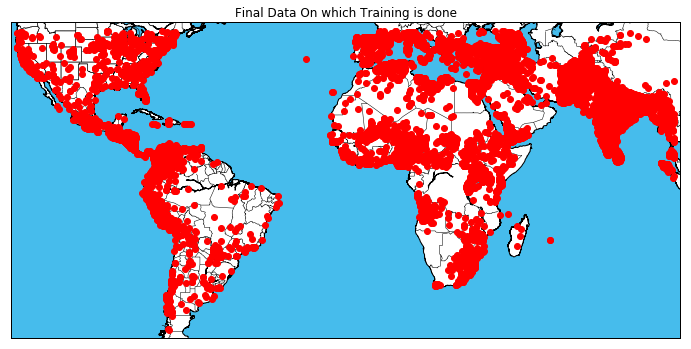

In [57]:
lat=dat['latitude'].values
lon=dat['longitude'].values

plot_map(lat,lon,"Final Data On which Training is done")

D:\programs\anaconda\envs\tf-gpu\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


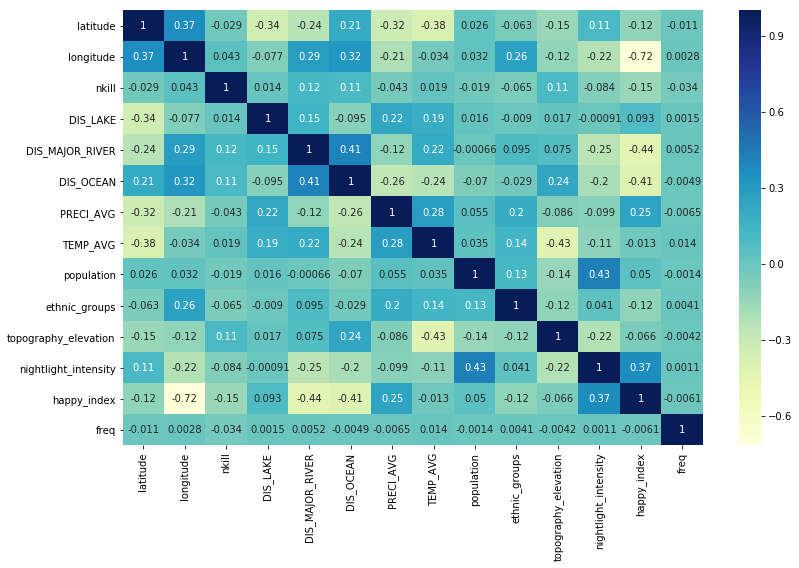

In [59]:
fig = plt.figure(figsize=(13,8))
sns.heatmap(dat.corr(),cmap="YlGnBu",annot=True)
fig.show()

In [60]:
# shuffling the dataset
dat = dat.sample(frac=1).reset_index(drop=True)

In [61]:
dat.columns

Index(['latitude', 'longitude', 'nkill', 'DIS_LAKE', 'DIS_MAJOR_RIVER',
       'DIS_OCEAN', 'PRECI_AVG', 'TEMP_AVG', 'population', 'ethnic_groups',
       'topography_elevation', 'nightlight_intensity', 'happy_index', 'freq'],
      dtype='object')

In [62]:
from sklearn import preprocessing

In [63]:
X=dat.drop(columns=['nkill'])
y=dat['nkill']

In [64]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

D:\programs\anaconda\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [65]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=101)

### voting classifier

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [67]:
logClf = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
rfClf = RandomForestClassifier(n_estimators=50, random_state=1)
svmClf = SVC(gamma='auto',probability=True)
gaussClf = GaussianNB()

In [68]:
eclf = VotingClassifier(estimators=[('lr', logClf), ('rf', rfClf), ('gnb', gaussClf),('svm', svmClf)], voting='hard')

In [69]:
for clf, label in zip([logClf, rfClf, gaussClf, svmClf, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'SVM Classifier', 'Ensemble']):
    clf.fit(X_train, y_train) 
    print(str("*****************"+label+"*****************"))
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("cross val scores : ", scores)
    predicted_y=clf.predict(X_test)
    print(metrics.classification_report(y_test, predicted_y)) 
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

*****************Logistic Regression*****************
cross val scores :  [0.68648239 0.68712121 0.67715044 0.68813945 0.68359227]
              precision    recall  f1-score   support

           0       0.60      0.09      0.16      1074
           1       0.69      0.97      0.81      2226

   micro avg       0.68      0.68      0.68      3300
   macro avg       0.64      0.53      0.48      3300
weighted avg       0.66      0.68      0.60      3300

Accuracy: 0.68 (+/- 0.00) [Logistic Regression]
*****************Random Forest*****************
cross val scores :  [0.69784173 0.70037879 0.69609701 0.70632815 0.70140205]
              precision    recall  f1-score   support

           0       0.55      0.42      0.48      1074
           1       0.75      0.83      0.79      2226

   micro avg       0.70      0.70      0.70      3300
   macro avg       0.65      0.63      0.63      3300
weighted avg       0.69      0.70      0.69      3300

Accuracy: 0.70 (+/- 0.00) [Random Forest]


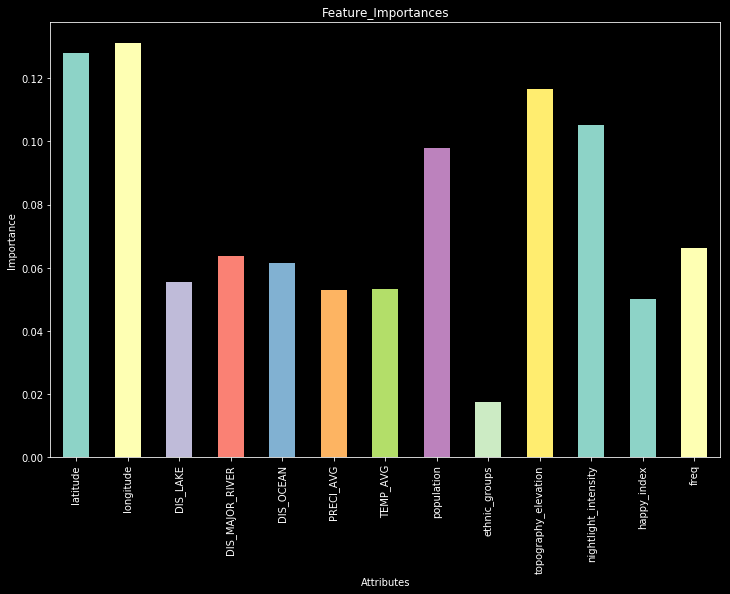

In [70]:
with plt.style.context('dark_background'):
    x_labels=list(dat.drop(columns=['nkill']).columns)
    # Plot the figure.
    freq_series = pd.Series.from_array(list(rfClf.feature_importances_))
    plt.figure(figsize=(12, 8))
    ax = freq_series.plot(kind='bar')
    ax.set_title('Feature_Importances')
    ax.set_xlabel('Attributes')
    ax.set_ylabel('Importance')
    ax.set_xticklabels(x_labels)


### advanced gradient boosting algo

In [71]:
def model(dataset): 
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    from sklearn import datasets
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt    
    
    plt.style.use('ggplot')

    from xgboost import XGBClassifier
    from sklearn import preprocessing
    from catboost import CatBoostClassifier
    from lightgbm import LGBMClassifier
    
    returnType = {}
    
    # load the wine datasets
    X = dataset.drop(columns=['nkill']);
    
    min_max_scaler = preprocessing.MinMaxScaler()
    X = min_max_scaler.fit_transform(X)
    
    y = dataset['nkill']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    # fit a XGBoost model to the data
    model = XGBClassifier()
    model.fit(X_train, y_train)
    print("")
    print(model)
    
    # make predictions
    expected_y  = y_test
    predicted_y = model.predict(X_test)

    # summarize the fit of the model
    print("")
    print('XGBoost: ')
    print("")
    print(metrics.classification_report(expected_y, predicted_y))
    print("")
    print(metrics.confusion_matrix(expected_y, predicted_y))
    returnType["xgb"]=model
    
    # fit a CatBoost model to the data
    model = CatBoostClassifier()
    model.fit(X_train, y_train)
    print("")
    print(model)

    # make predictions
    expected_y  = y_test
    predicted_y = model.predict(X_test)
    returnType["catboost"]=model
    # summarize the fit of the model
    print("")
    print('CatBoost: ')
    print("")
    print(metrics.classification_report(expected_y, predicted_y))
    print("")
    print(metrics.confusion_matrix(expected_y, predicted_y))
    
    # fit a LightGBM model to the data
    model = LGBMClassifier()
    model.fit(X_train, y_train)
    print("")
    print(model)

    # make predictions
    expected_y  = y_test
    predicted_y = model.predict(X_test)
    
    # summarize the fit of the model
    print("")
    print('LightGBM: ')
    print("")
    print(metrics.classification_report(expected_y, predicted_y))
    print("")
    print(metrics.confusion_matrix(expected_y, predicted_y))    
    returnType["lightgbm"]=model
    
    return returnType

In [72]:
mod=model(dat)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGBoost: 

              precision    recall  f1-score   support

           0       0.66      0.26      0.37      1068
           1       0.73      0.94      0.82      2232

   micro avg       0.72      0.72      0.72      3300
   macro avg       0.69      0.60      0.60      3300
weighted avg       0.71      0.72      0.67      3300


[[ 279  789]
 [ 142 2090]]
Learning rate set to 0.034772
0:	learn: 0.6855221	total: 180ms	remaining: 2m 59s
1:	learn: 0.6783215	total: 256ms	remaining: 2m 7s
2:	learn: 0.6718655	total: 335ms	remaining: 1m 51s
3:	learn: 0.6651258	total: 414ms	remaining: 1m 42s
4:	learn: 0

144:	learn: 0.5488906	total: 11s	remaining: 1m 4s
145:	learn: 0.5487998	total: 11s	remaining: 1m 4s
146:	learn: 0.5485671	total: 11.1s	remaining: 1m 4s
147:	learn: 0.5484036	total: 11.2s	remaining: 1m 4s
148:	learn: 0.5482271	total: 11.3s	remaining: 1m 4s
149:	learn: 0.5481822	total: 11.3s	remaining: 1m 4s
150:	learn: 0.5479836	total: 11.4s	remaining: 1m 4s
151:	learn: 0.5478066	total: 11.5s	remaining: 1m 3s
152:	learn: 0.5477064	total: 11.5s	remaining: 1m 3s
153:	learn: 0.5476149	total: 11.6s	remaining: 1m 3s
154:	learn: 0.5475338	total: 11.7s	remaining: 1m 3s
155:	learn: 0.5473176	total: 11.7s	remaining: 1m 3s
156:	learn: 0.5472697	total: 11.8s	remaining: 1m 3s
157:	learn: 0.5471465	total: 11.9s	remaining: 1m 3s
158:	learn: 0.5469677	total: 11.9s	remaining: 1m 3s
159:	learn: 0.5468243	total: 12s	remaining: 1m 3s
160:	learn: 0.5465649	total: 12.1s	remaining: 1m 2s
161:	learn: 0.5463692	total: 12.1s	remaining: 1m 2s
162:	learn: 0.5462670	total: 12.2s	remaining: 1m 2s
163:	learn: 0.5461

304:	learn: 0.5325434	total: 22.9s	remaining: 52.1s
305:	learn: 0.5325275	total: 23s	remaining: 52.1s
306:	learn: 0.5324165	total: 23s	remaining: 52s
307:	learn: 0.5323532	total: 23.1s	remaining: 51.9s
308:	learn: 0.5323102	total: 23.2s	remaining: 51.9s
309:	learn: 0.5322550	total: 23.3s	remaining: 51.8s
310:	learn: 0.5321944	total: 23.3s	remaining: 51.7s
311:	learn: 0.5321853	total: 23.4s	remaining: 51.6s
312:	learn: 0.5321048	total: 23.5s	remaining: 51.5s
313:	learn: 0.5320328	total: 23.5s	remaining: 51.4s
314:	learn: 0.5319426	total: 23.6s	remaining: 51.4s
315:	learn: 0.5318477	total: 23.7s	remaining: 51.3s
316:	learn: 0.5318088	total: 23.8s	remaining: 51.3s
317:	learn: 0.5317800	total: 23.9s	remaining: 51.2s
318:	learn: 0.5317582	total: 23.9s	remaining: 51.1s
319:	learn: 0.5317119	total: 24s	remaining: 51s
320:	learn: 0.5316528	total: 24.1s	remaining: 51s
321:	learn: 0.5315866	total: 24.2s	remaining: 50.9s
322:	learn: 0.5315047	total: 24.3s	remaining: 50.9s
323:	learn: 0.5314220	to

463:	learn: 0.5220329	total: 34.9s	remaining: 40.4s
464:	learn: 0.5219949	total: 35s	remaining: 40.3s
465:	learn: 0.5218557	total: 35.1s	remaining: 40.2s
466:	learn: 0.5218017	total: 35.2s	remaining: 40.2s
467:	learn: 0.5217969	total: 35.3s	remaining: 40.1s
468:	learn: 0.5217507	total: 35.3s	remaining: 40s
469:	learn: 0.5217119	total: 35.4s	remaining: 39.9s
470:	learn: 0.5216995	total: 35.5s	remaining: 39.8s
471:	learn: 0.5216861	total: 35.6s	remaining: 39.8s
472:	learn: 0.5216756	total: 35.6s	remaining: 39.7s
473:	learn: 0.5215934	total: 35.7s	remaining: 39.6s
474:	learn: 0.5215653	total: 35.8s	remaining: 39.5s
475:	learn: 0.5214753	total: 35.8s	remaining: 39.5s
476:	learn: 0.5214563	total: 35.9s	remaining: 39.4s
477:	learn: 0.5212800	total: 36s	remaining: 39.3s
478:	learn: 0.5212462	total: 36.1s	remaining: 39.2s
479:	learn: 0.5212283	total: 36.2s	remaining: 39.2s
480:	learn: 0.5211282	total: 36.2s	remaining: 39.1s
481:	learn: 0.5210675	total: 36.3s	remaining: 39s
482:	learn: 0.521055

622:	learn: 0.5149930	total: 46.9s	remaining: 28.4s
623:	learn: 0.5149608	total: 47s	remaining: 28.3s
624:	learn: 0.5149058	total: 47.1s	remaining: 28.3s
625:	learn: 0.5148242	total: 47.2s	remaining: 28.2s
626:	learn: 0.5147660	total: 47.2s	remaining: 28.1s
627:	learn: 0.5147623	total: 47.3s	remaining: 28s
628:	learn: 0.5147475	total: 47.4s	remaining: 28s
629:	learn: 0.5146913	total: 47.5s	remaining: 27.9s
630:	learn: 0.5146870	total: 47.5s	remaining: 27.8s
631:	learn: 0.5146570	total: 47.6s	remaining: 27.7s
632:	learn: 0.5146539	total: 47.7s	remaining: 27.6s
633:	learn: 0.5145970	total: 47.8s	remaining: 27.6s
634:	learn: 0.5145661	total: 47.8s	remaining: 27.5s
635:	learn: 0.5145490	total: 47.9s	remaining: 27.4s
636:	learn: 0.5145348	total: 48s	remaining: 27.3s
637:	learn: 0.5145307	total: 48.1s	remaining: 27.3s
638:	learn: 0.5144948	total: 48.1s	remaining: 27.2s
639:	learn: 0.5144859	total: 48.2s	remaining: 27.1s
640:	learn: 0.5144184	total: 48.3s	remaining: 27s
641:	learn: 0.5144063	

781:	learn: 0.5096512	total: 59.2s	remaining: 16.5s
782:	learn: 0.5096464	total: 59.3s	remaining: 16.4s
783:	learn: 0.5096432	total: 59.4s	remaining: 16.4s
784:	learn: 0.5096408	total: 59.4s	remaining: 16.3s
785:	learn: 0.5095296	total: 59.5s	remaining: 16.2s
786:	learn: 0.5095274	total: 59.6s	remaining: 16.1s
787:	learn: 0.5095257	total: 59.7s	remaining: 16.1s
788:	learn: 0.5094907	total: 59.8s	remaining: 16s
789:	learn: 0.5094666	total: 59.9s	remaining: 15.9s
790:	learn: 0.5094309	total: 59.9s	remaining: 15.8s
791:	learn: 0.5094282	total: 1m	remaining: 15.8s
792:	learn: 0.5093644	total: 1m	remaining: 15.7s
793:	learn: 0.5093632	total: 1m	remaining: 15.6s
794:	learn: 0.5093173	total: 1m	remaining: 15.5s
795:	learn: 0.5092128	total: 1m	remaining: 15.5s
796:	learn: 0.5092114	total: 1m	remaining: 15.4s
797:	learn: 0.5091076	total: 1m	remaining: 15.3s
798:	learn: 0.5091066	total: 1m	remaining: 15.2s
799:	learn: 0.5091004	total: 1m	remaining: 15.2s
800:	learn: 0.5090936	total: 1m	remaining

940:	learn: 0.5056660	total: 1m 11s	remaining: 4.47s
941:	learn: 0.5056625	total: 1m 11s	remaining: 4.39s
942:	learn: 0.5056607	total: 1m 11s	remaining: 4.32s
943:	learn: 0.5056165	total: 1m 11s	remaining: 4.24s
944:	learn: 0.5056122	total: 1m 11s	remaining: 4.17s
945:	learn: 0.5056069	total: 1m 11s	remaining: 4.09s
946:	learn: 0.5055798	total: 1m 11s	remaining: 4.01s
947:	learn: 0.5055796	total: 1m 11s	remaining: 3.94s
948:	learn: 0.5055705	total: 1m 11s	remaining: 3.86s
949:	learn: 0.5055335	total: 1m 11s	remaining: 3.78s
950:	learn: 0.5055187	total: 1m 11s	remaining: 3.71s
951:	learn: 0.5054928	total: 1m 12s	remaining: 3.63s
952:	learn: 0.5054738	total: 1m 12s	remaining: 3.56s
953:	learn: 0.5054204	total: 1m 12s	remaining: 3.48s
954:	learn: 0.5053923	total: 1m 12s	remaining: 3.4s
955:	learn: 0.5053811	total: 1m 12s	remaining: 3.33s
956:	learn: 0.5053807	total: 1m 12s	remaining: 3.25s
957:	learn: 0.5053160	total: 1m 12s	remaining: 3.18s
958:	learn: 0.5052805	total: 1m 12s	remaining: 

### Neural Network

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [111]:
model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=128)

Train on 13198 samples, validate on 3300 samples
Epoch 1/50
13198/13198 [==============================] - ETA: 1:41 - loss: 0.6989 - acc: 0.437 - ETA: 7s - loss: 0.6916 - acc: 0.5443  - ETA: 4s - loss: 0.6874 - acc: 0.597 - ETA: 2s - loss: 0.6830 - acc: 0.619 - ETA: 1s - loss: 0.6792 - acc: 0.628 - ETA: 1s - loss: 0.6742 - acc: 0.639 - ETA: 0s - loss: 0.6700 - acc: 0.645 - ETA: 0s - loss: 0.6658 - acc: 0.651 - ETA: 0s - loss: 0.6622 - acc: 0.654 - ETA: 0s - loss: 0.6591 - acc: 0.656 - ETA: 0s - loss: 0.6554 - acc: 0.659 - 2s 127us/step - loss: 0.6555 - acc: 0.6593 - val_loss: 0.6295 - val_acc: 0.6745
Epoch 2/50
13198/13198 [==============================] - ETA: 0s - loss: 0.6406 - acc: 0.656 - ETA: 0s - loss: 0.6231 - acc: 0.682 - ETA: 0s - loss: 0.6340 - acc: 0.665 - ETA: 0s - loss: 0.6310 - acc: 0.669 - ETA: 0s - loss: 0.6295 - acc: 0.671 - ETA: 0s - loss: 0.6270 - acc: 0.674 - ETA: 0s - loss: 0.6274 - acc: 0.672 - ETA: 0s - loss: 0.6268 - acc: 0.672 - ETA: 0s - loss: 0.6256 - acc:

13198/13198 [==============================] - ETA: 0s - loss: 0.5740 - acc: 0.664 - ETA: 0s - loss: 0.5766 - acc: 0.708 - ETA: 0s - loss: 0.5820 - acc: 0.703 - ETA: 0s - loss: 0.5842 - acc: 0.702 - ETA: 0s - loss: 0.5846 - acc: 0.706 - ETA: 0s - loss: 0.5813 - acc: 0.710 - ETA: 0s - loss: 0.5804 - acc: 0.710 - ETA: 0s - loss: 0.5800 - acc: 0.710 - ETA: 0s - loss: 0.5804 - acc: 0.709 - ETA: 0s - loss: 0.5818 - acc: 0.708 - ETA: 0s - loss: 0.5831 - acc: 0.706 - 1s 45us/step - loss: 0.5831 - acc: 0.7050 - val_loss: 0.5877 - val_acc: 0.7018
Epoch 16/50
13198/13198 [==============================] - ETA: 0s - loss: 0.5338 - acc: 0.718 - ETA: 0s - loss: 0.5835 - acc: 0.700 - ETA: 0s - loss: 0.5843 - acc: 0.700 - ETA: 0s - loss: 0.5798 - acc: 0.706 - ETA: 0s - loss: 0.5811 - acc: 0.704 - ETA: 0s - loss: 0.5804 - acc: 0.704 - ETA: 0s - loss: 0.5818 - acc: 0.703 - ETA: 0s - loss: 0.5828 - acc: 0.703 - ETA: 0s - loss: 0.5836 - acc: 0.702 - ETA: 0s - loss: 0.5844 - acc: 0.702 - 1s 41us/step - lo

13198/13198 [==============================] - ETA: 0s - loss: 0.5499 - acc: 0.734 - ETA: 0s - loss: 0.5887 - acc: 0.697 - ETA: 0s - loss: 0.5769 - acc: 0.707 - ETA: 0s - loss: 0.5776 - acc: 0.706 - ETA: 0s - loss: 0.5801 - acc: 0.702 - ETA: 0s - loss: 0.5796 - acc: 0.704 - ETA: 0s - loss: 0.5745 - acc: 0.708 - ETA: 0s - loss: 0.5802 - acc: 0.704 - ETA: 0s - loss: 0.5806 - acc: 0.703 - ETA: 0s - loss: 0.5807 - acc: 0.703 - ETA: 0s - loss: 0.5810 - acc: 0.703 - ETA: 0s - loss: 0.5793 - acc: 0.706 - ETA: 0s - loss: 0.5783 - acc: 0.706 - 1s 55us/step - loss: 0.5789 - acc: 0.7059 - val_loss: 0.5837 - val_acc: 0.7048
Epoch 30/50
13198/13198 [==============================] - ETA: 0s - loss: 0.5664 - acc: 0.718 - ETA: 0s - loss: 0.5793 - acc: 0.706 - ETA: 0s - loss: 0.5801 - acc: 0.703 - ETA: 0s - loss: 0.5754 - acc: 0.707 - ETA: 0s - loss: 0.5748 - acc: 0.708 - ETA: 0s - loss: 0.5765 - acc: 0.707 - ETA: 0s - loss: 0.5758 - acc: 0.707 - ETA: 0s - loss: 0.5765 - acc: 0.707 - ETA: 0s - loss: 0

Epoch 43/50
13198/13198 [==============================] - ETA: 0s - loss: 0.5686 - acc: 0.710 - ETA: 0s - loss: 0.5511 - acc: 0.728 - ETA: 0s - loss: 0.5610 - acc: 0.722 - ETA: 0s - loss: 0.5658 - acc: 0.713 - ETA: 0s - loss: 0.5686 - acc: 0.711 - ETA: 0s - loss: 0.5635 - acc: 0.717 - ETA: 0s - loss: 0.5643 - acc: 0.715 - ETA: 0s - loss: 0.5645 - acc: 0.714 - ETA: 0s - loss: 0.5650 - acc: 0.713 - ETA: 0s - loss: 0.5692 - acc: 0.710 - ETA: 0s - loss: 0.5724 - acc: 0.706 - ETA: 0s - loss: 0.5727 - acc: 0.705 - ETA: 0s - loss: 0.5726 - acc: 0.706 - 1s 57us/step - loss: 0.5738 - acc: 0.7051 - val_loss: 0.5814 - val_acc: 0.7067
Epoch 44/50
13198/13198 [==============================] - ETA: 0s - loss: 0.6047 - acc: 0.679 - ETA: 0s - loss: 0.5721 - acc: 0.708 - ETA: 0s - loss: 0.5650 - acc: 0.714 - ETA: 0s - loss: 0.5670 - acc: 0.713 - ETA: 0s - loss: 0.5718 - acc: 0.706 - ETA: 0s - loss: 0.5724 - acc: 0.706 - ETA: 0s - loss: 0.5738 - acc: 0.704 - ETA: 0s - loss: 0.5775 - acc: 0.700 - ETA: 

In [129]:
expected_y  = y_test
predicted_y = model.predict(X_test)

# summarize the fit of the model
print("")
print('Deep Neural Network: ')
print("")
print(metrics.classification_report(expected_y, predicted_y.round()))
print("")
print(metrics.confusion_matrix(expected_y, predicted_y.round()))    
#returnType["lightgbm"]=model


Deep Neural Network: 

              precision    recall  f1-score   support

           0       0.64      0.22      0.33      1074
           1       0.71      0.94      0.81      2226

   micro avg       0.71      0.71      0.71      3300
   macro avg       0.68      0.58      0.57      3300
weighted avg       0.69      0.71      0.65      3300


[[ 236  838]
 [ 135 2091]]


### ROC Curve

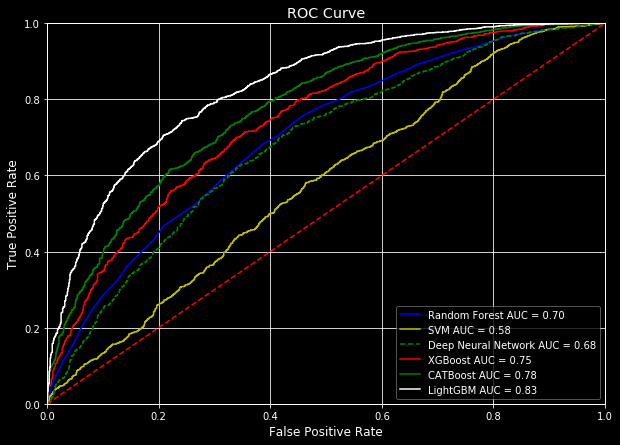

In [152]:
import sklearn.metrics as metrics
with plt.style.context('dark_background'):
    plt.figure(0,figsize=(10,7))

    # calculate the fpr and tpr for all thresholds of the classification
    probs = rfClf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'Random Forest AUC = %0.2f' % roc_auc,)


    probs = svmClf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'y', label = 'SVM AUC = %0.2f' % roc_auc)

    
    probs = model.predict_proba(X_test)
    preds = probs.flatten()
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'g--', label = 'Deep Neural Network AUC = %0.2f' % roc_auc)
    
    
    probs = mod["xgb"].predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'r', label = 'XGBoost AUC = %0.2f' % roc_auc)
    
    
    probs = mod["catboost"].predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'g', label = 'CATBoost AUC = %0.2f' % roc_auc)
    
    
    probs = mod["lightgbm"].predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'w', label = 'LightGBM AUC = %0.2f' % roc_auc)
    
    
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
